In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('./data/original_data.txt', sep='\t', header=None, names=['node1', 'node2', 'start_contact', 'end_contact', 'contact_count', 'time_since_last_contact']);

In [4]:
data['duration_of_contact'] = data.apply(lambda row: row['end_contact'] - row['start_contact'], axis=1)

In [5]:
data

,node1,node2,start_contact,end_contact,contact_count,time_since_last_contact,duration_of_contact
0,1,8,121,121,1,0,0
1,1,3,236,347,1,0,111
2,1,4,236,347,1,0,111
3,1,5,121,464,1,0,343
4,1,8,585,585,2,464,0
5,1,5,700,816,2,236,116
6,1,3,589,940,2,242,351
7,1,4,589,940,2,242,351
8,1,9,940,940,1,0,0
9,1,2,1306,1306,1,0,0


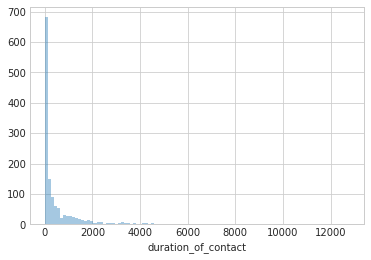

In [6]:

sns.distplot(data['duration_of_contact'], bins=100, kde=False)


In [7]:
derived_features = pd.read_csv('./data/mobility pattern & 1 way contact.txt', sep='\t', header=0)

In [8]:
derived_features

,Source node,Destination node,NOC,Total DOC,No of Interactions
0,1,2,19,1241,6
1,1,6,2,7,1
2,1,7,27,2921,127
3,1,8,24,1176,7
4,1,9,17,1212,4
5,2,1,32,4803,13
6,2,5,11,595,3
7,2,8,10,1597,4
8,3,5,3,0,0
9,3,8,2,579,1


In [9]:
df = derived_features.iloc[:, 2:]
derived_features.iloc[:, 2:] = (df - df.mean()) / (df.max() - df.min())

In [10]:
derived_features

,Source node,Destination node,NOC,Total DOC,No of Interactions
0,1,2,0.271207,-0.035855,-0.015748
1,1,6,-0.277180,-0.057985,-0.055118
2,1,7,0.529271,-0.005726,0.937008
3,1,8,0.432497,-0.037020,-0.007874
4,1,9,0.206691,-0.036375,-0.031496
5,2,1,0.690562,0.028025,0.039370
6,2,5,0.013142,-0.047440,-0.039370
7,2,8,-0.019116,-0.029470,-0.031496
8,3,5,-0.244922,-0.058110,-0.062992
9,3,8,-0.277180,-0.047727,-0.055118


In [11]:
number_of_nodes = 9
w1=0.5/number_of_nodes
w2=0.7/number_of_nodes
w3=1/number_of_nodes

derived_features['edge weights'] = derived_features.apply(lambda row: w1*row['NOC']+w2*row['Total DOC']+w3*row['No of Interactions'], axis=1)

In [12]:
derived_features[['Source node', 'Destination node', 'edge weights']].to_csv('./data/graph.edgelist', sep='\t',index=False)

In [13]:
# run for generating embeddings in terminal


#source activate py27
#python /home/neelansh/node2vec/src/main.py --input ~/social_interaction/data/graph.edgelist --output ~/social_interaction/data/graph.emd --weighted --directed
#source deactivate

In [14]:
embeddings = pd.read_csv('./data/graph.emd', sep=' ', header=None)

In [15]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1,-0.003943,-0.004013,0.003684,-0.002711,0.001740,-0.003835,-0.000561,0.002774,0.003254,...,-0.003060,-0.001883,-0.000567,0.002261,-0.003200,0.000381,-0.001366,-0.000989,-0.001025,0.000956
1,5,0.000551,-0.003633,-0.003890,-0.000114,0.002903,-0.001234,0.003554,-0.003295,0.003805,...,0.003207,0.001503,-0.000521,0.001536,0.000933,-0.003774,-0.003330,0.001904,-0.001579,0.003849
2,7,0.003590,0.000190,-0.003465,-0.000929,-0.003079,0.002565,0.000875,0.001024,0.003760,...,-0.003275,0.003662,-0.001951,0.003232,0.003083,0.001037,-0.002530,-0.002165,0.003473,0.003345
3,4,-0.000159,0.003625,0.000078,0.001617,0.002419,-0.002636,-0.003417,0.003921,0.000657,...,-0.000634,-0.000128,0.001922,0.000979,-0.003638,-0.003960,-0.003685,0.000947,0.003533,0.002471
4,8,0.000496,-0.003831,0.002070,0.000810,-0.002550,0.001302,0.002142,0.000869,0.000056,...,-0.002255,-0.000070,-0.002246,-0.003336,0.003234,0.000653,0.001838,-0.003703,0.002748,-0.002315
5,2,0.003013,-0.000686,-0.000760,-0.001088,-0.001075,0.000230,0.001668,0.002333,-0.003322,...,-0.002911,-0.001162,-0.001320,-0.001914,0.001338,-0.003493,0.001467,0.001641,0.003864,0.000389
6,3,-0.003490,0.000678,0.003567,0.000621,0.001100,-0.000287,0.002140,0.000019,-0.003595,...,0.003107,0.000396,-0.001957,-0.003405,-0.001388,-0.000767,-0.002698,0.000650,0.001232,0.001688
7,9,-0.001207,0.000353,-0.003278,-0.000940,0.000084,0.000000,-0.000420,0.001925,0.003862,...,-0.001601,0.002829,-0.001669,-0.002074,-0.001503,0.000920,-0.002250,0.003152,0.000322,0.001615
8,6,0.001026,-0.000983,0.000904,0.003571,0.000424,0.001260,0.001916,0.002410,-0.000480,...,0.000243,-0.000756,0.000823,-0.001933,0.002579,-0.003836,-0.003369,0.001062,0.003770,-0.003659


In [31]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, n_iter=300)
tsne_results = tsne.fit_transform(embeddings.loc[:, 1:].values)

[t-SNE] Computing 8 nearest neighbors...
[t-SNE] Indexed 9 samples in 0.000s...
[t-SNE] Computed neighbors for 9 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.457336
[t-SNE] Error after 300 iterations: 0.285787


In [32]:
tsne_results = pd.DataFrame(tsne_results)
tsne_results['labels'] = embeddings[0]

In [33]:
tsne_results.columns = ['x', 'y', 'labels']

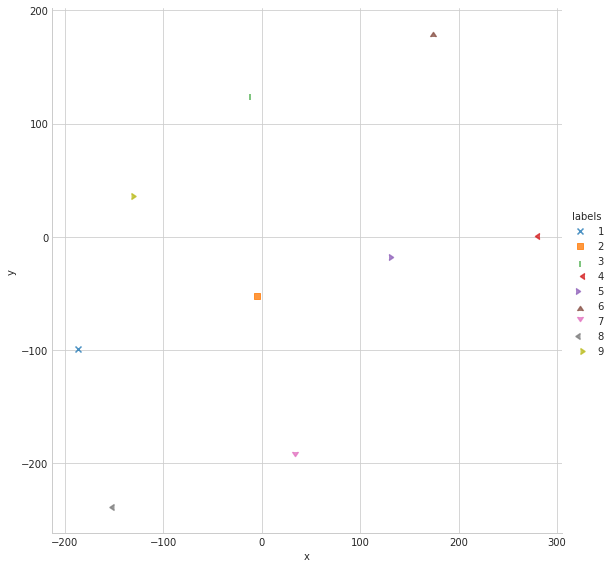

In [34]:
sns.lmplot(data=tsne_results, x='x', y='y', hue='labels', fit_reg=False, legend=True, legend_out=True, markers=['x','s',3,4,5,6,7,8,9], size=8)

In [35]:
tsne_results

,x,y,labels
0,-186.442612,-99.197693,1
1,133.815353,-18.107990,5
2,34.429321,-193.685715,7
3,277.282684,0.532762,4
4,-150.104538,-238.722916,8
5,-5.090450,-52.230438,2
6,-11.563387,125.830971,3
7,-132.869461,36.380806,9
8,174.388306,180.576431,6


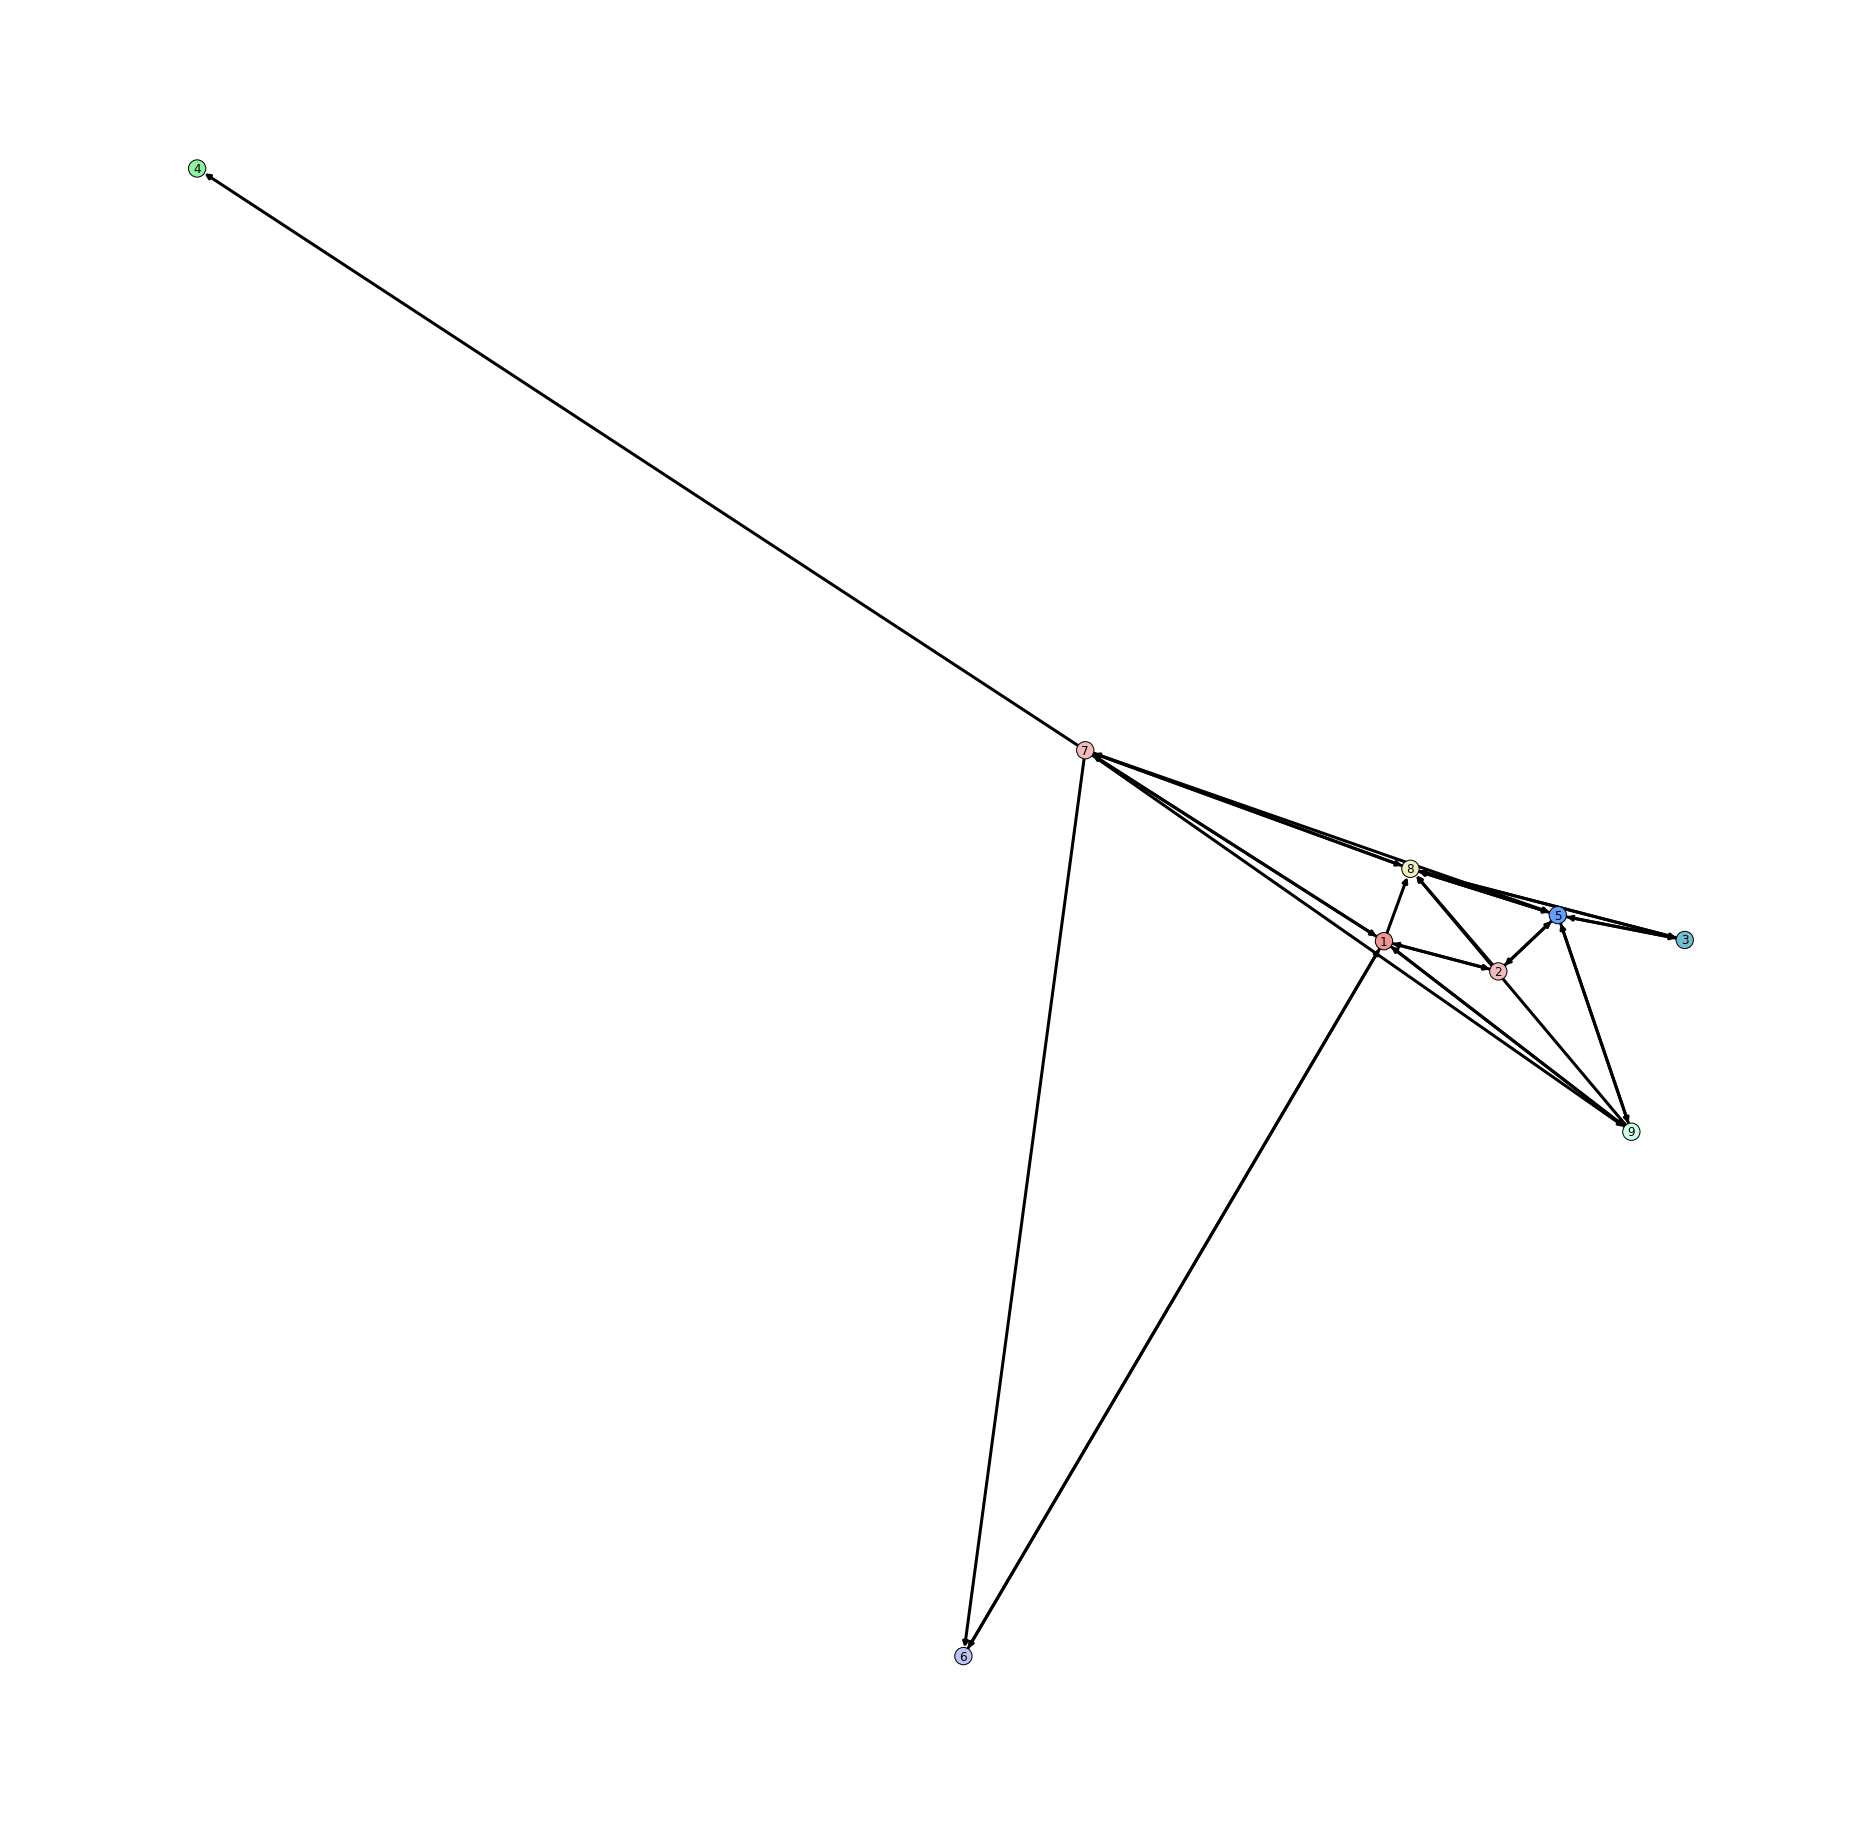

In [28]:
import networkx as nx

G = nx.DiGraph(day="Stackoverflow")
df_nodes = pd.DataFrame(np.array([1,2,3,4,5,6,7,8,9]), columns=['name'])
df_edges = pd.read_csv('./data/graph.edgelist', sep='\t', header=None, names=['A', 'B', 'weight'])

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['name'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['A'], row['B'], row['weight'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#000000',
    'width': 3,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
# sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000") 
plt.show()

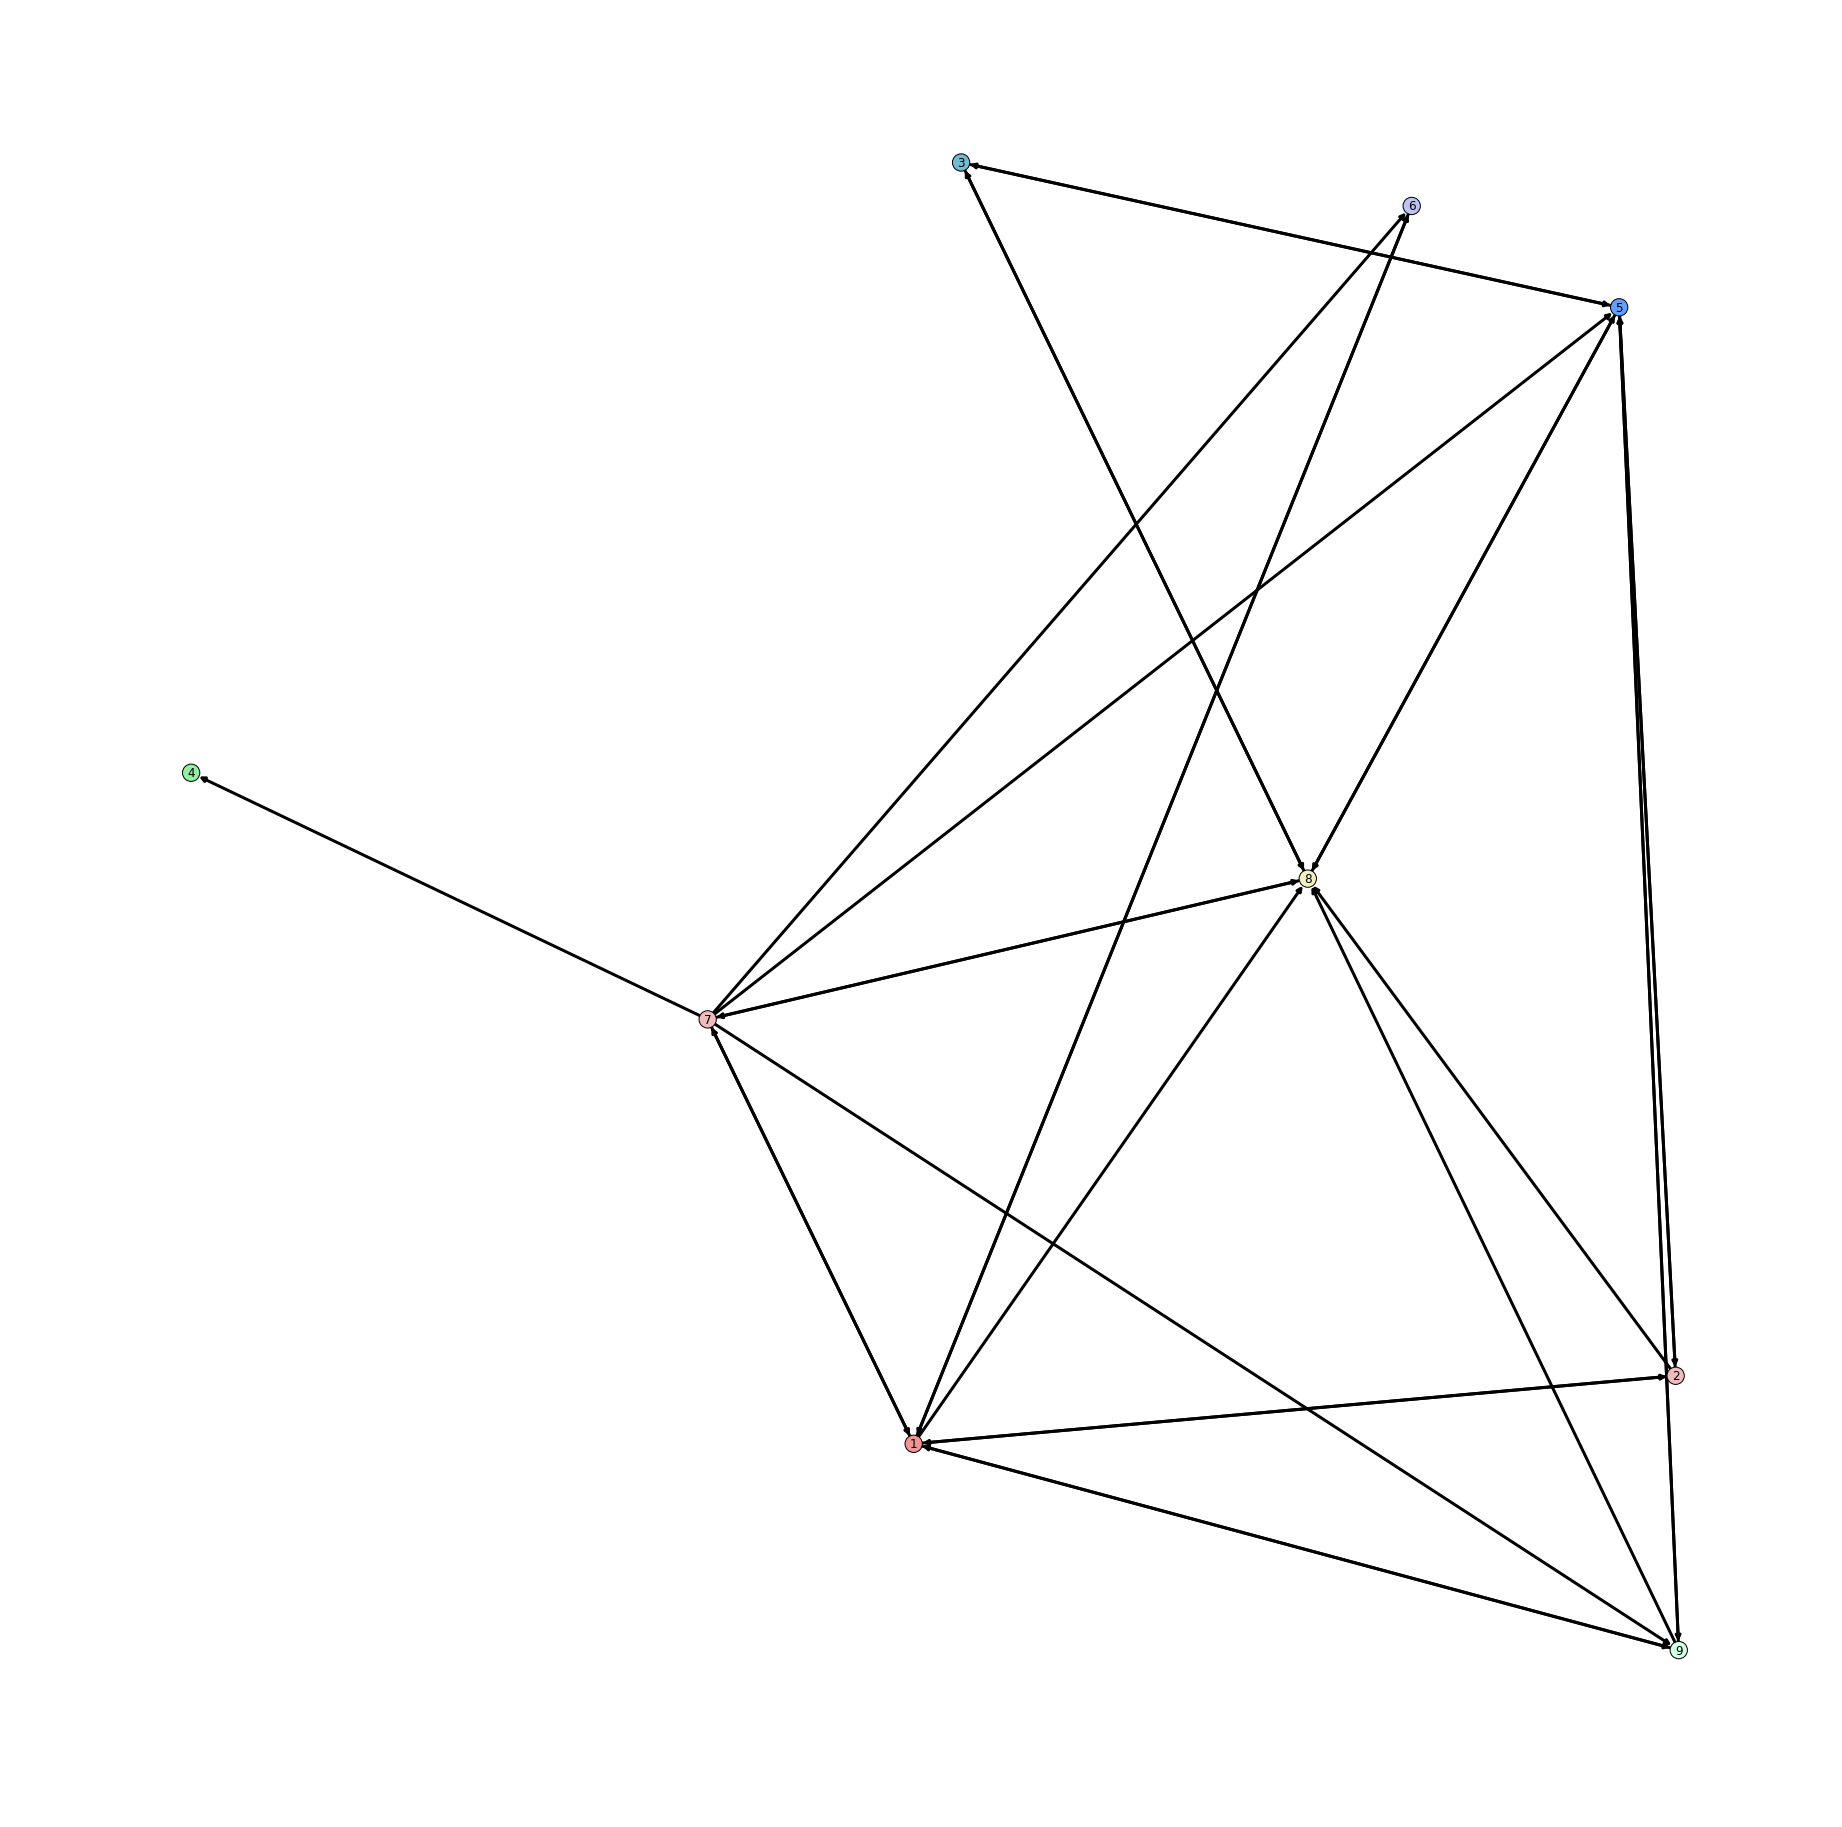

In [21]:
import networkx as nx

G = nx.DiGraph(day="Stackoverflow")
df_nodes = pd.DataFrame(np.array([1,2,3,4,5,6,7,8,9]), columns=['name'])
df_edges = pd.read_csv('./data/graph.edgelist', sep='\t', header=None, names=['A', 'B', 'weight'])

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['name'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['A'], row['B'], row['weight'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#000000',
    'width': 3,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
# sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#000000") 
plt.show()

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
# pca.fit(embeddings.loc[:, 1:].values)
X = pca.fit_transform(embeddings.loc[:, 1:].values)

In [41]:
X = pd.DataFrame(X, columns=['x', 'y'])
X['labels'] = embeddings[0]

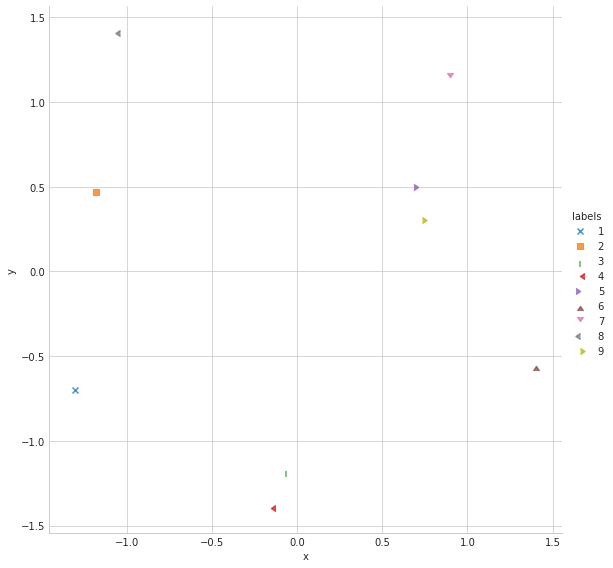

In [42]:
sns.lmplot(data=X, x='x', y='y', hue='labels', fit_reg=False, legend=True, legend_out=True, markers=['x','s',3,4,5,6,7,8,9], size=8)

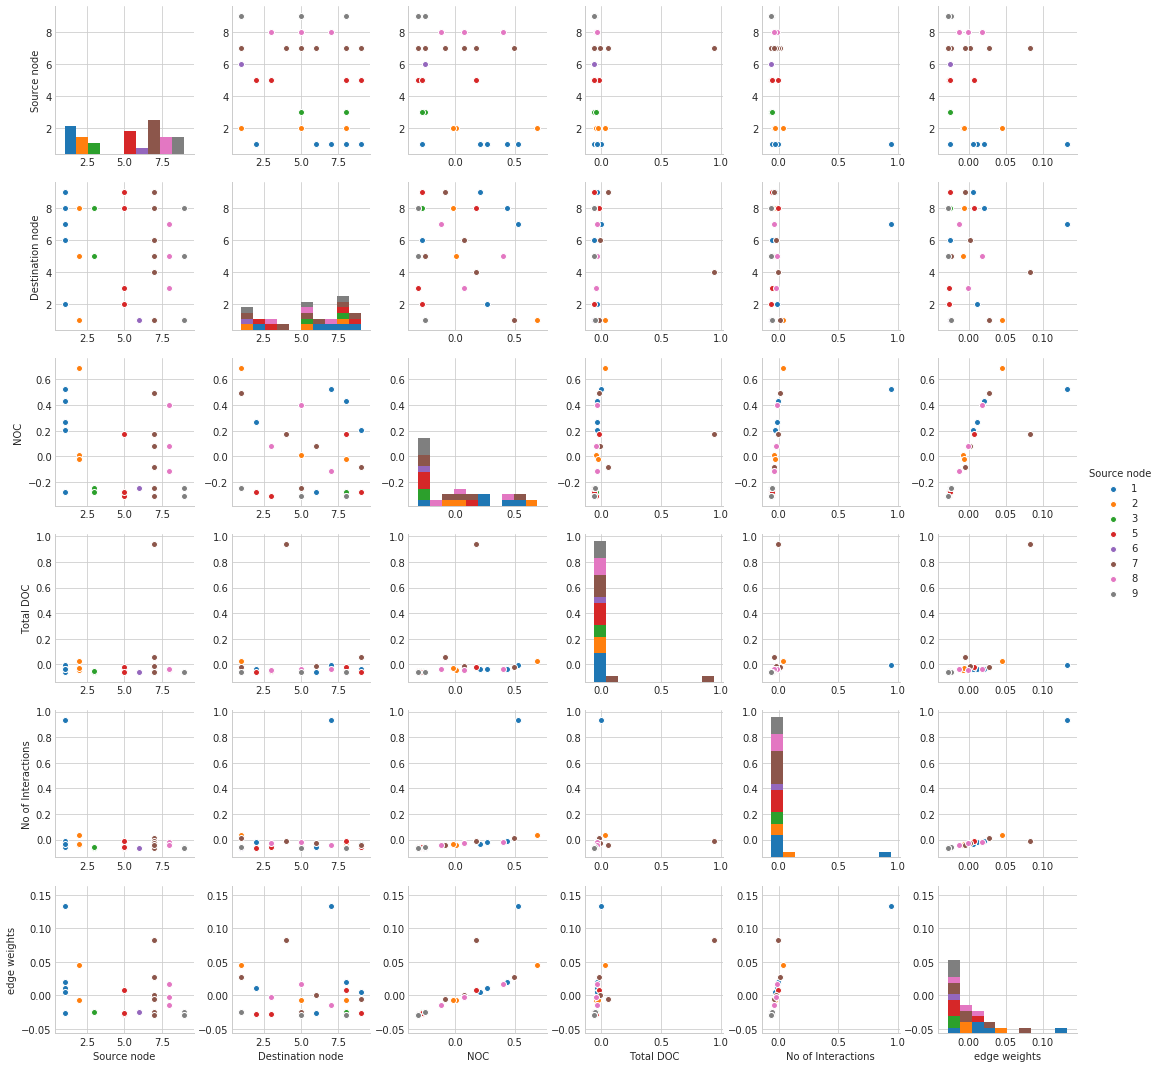

In [43]:
sns.pairplot(data=derived_features, hue='Source node')

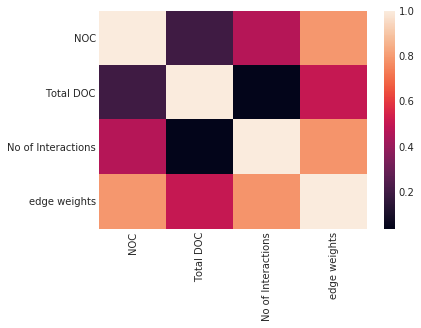

In [45]:
sns.heatmap(data=derived_features.iloc[:, 2:].corr())

In [ ]:
for i in range(1,10):
    for j in range(1,10):
        print(i,j)
        temp = data.loc[(data['node1'] == i) & (data['node2'] == j)]
        if not (len(temp)==0):
            sns.pointplot(data = temp, x='start_contact', y='duration_of_contact')
            plt.show()

In [68]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, n_iter=300, method='exact')
tsne_results = tsne.fit_transform(embeddings.loc[:, 1:].values)

tsne_results = pd.DataFrame(tsne_results)
tsne_results['labels'] = embeddings[0]



[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.512927
[t-SNE] Error after 300 iterations: 0.234574


In [69]:
tsne_results.columns = ['x', 'y', 'labels']

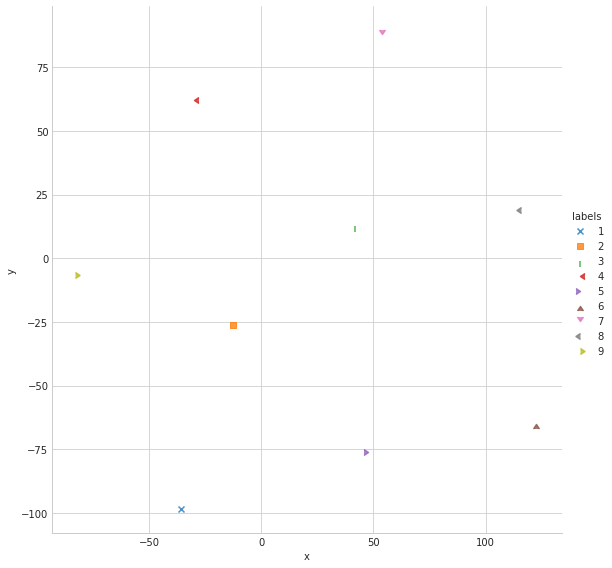

In [70]:
sns.lmplot(data=tsne_results, x='x', y='y', hue='labels', fit_reg=False, legend=True, legend_out=True, markers=['x','s',3,4,5,6,7,8,9], size=8)

In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=10, verbose=1, n_iter=300, method='exact')
tsne_results = tsne.fit_transform(embeddings.loc[:, 1:].values)

tsne_results = pd.DataFrame(tsne_results)
tsne_results['labels'] = embeddings[0]

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 9 / 9
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 50 iterations with early exaggeration: 50.427306
[t-SNE] Error after 100 iterations: 1.717369


In [80]:
from sklearn.cluster import KMeans


X = embeddings.loc[:, 1:].values
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=20).fit(X)

kmeans.labels_

array([1, 2, 2, 1, 0, 0, 1, 2, 1], dtype=int32)

In [81]:
embeddings[0].values

array([1, 5, 7, 4, 8, 2, 3, 9, 6])

In [88]:
from sklearn.cluster import KMeans


X = tsne_results.iloc[:, :10].values
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=20).fit(X)

kmeans.labels_

array([0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

In [89]:
tsne_results['groups'] = [0,0,1,1,1,1,0,0,0]
tsne_results

,0,1,2,3,4,5,6,7,8,9,labels,groups
0,-0.455996,-24.211014,-17.762423,-5.026322,46.089012,20.177896,13.846142,-7.587954,-54.606644,-26.277102,1,0
1,-41.966171,13.029540,29.422577,-47.490791,-18.175524,-44.667927,-58.175011,-24.243446,17.734692,-12.058256,5,0
2,35.285206,-9.475214,-10.374743,27.014856,-20.519327,1.595146,14.743008,20.404793,0.679740,50.737038,7,1
3,-13.939975,8.692904,-12.378079,1.482965,-53.908596,-5.299953,-7.969108,14.034260,9.656914,-7.026284,4,1
4,-20.138996,-44.972736,-46.167683,68.434891,62.288200,-6.244538,-12.745446,-28.871349,46.295532,-0.934509,8,1
5,38.641014,13.111130,5.340786,17.462301,-22.824080,6.415665,53.559605,54.759132,-23.478254,-29.547258,2,1
6,20.723732,-1.580826,32.982128,-31.550726,19.179598,3.346990,-56.894695,25.662903,-15.558027,6.088097,3,0
7,28.862286,4.713519,49.880539,-25.748787,-1.973374,5.872060,71.227219,-13.569630,1.163967,-48.543114,9,0
8,-47.011265,40.692345,-30.943043,-4.578311,-10.155568,18.804794,-17.591866,-40.588276,18.112114,67.561554,6,0


In [90]:
tsne_results.to_csv('./data/tsne_10.tsv', sep='\t')

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tsne_results.iloc[:, :10].values, tsne_results['groups'].values, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train) 
print(neigh.score(X_test, y_test))

1.0
